In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph      # type: ignore

In [2]:
class AgentState(TypedDict):  # Our state schema
  name: str
  age: str
  final: str

In [4]:
def first_node(state: AgentState) -> AgentState:
  """This is the first node in the graph"""

  state['final'] = f"Hello {state['name']}!"
  return state

def second_node(state: AgentState) -> AgentState:
  """This is the second node in the graph"""
  
  state['final'] += f" You are {state['age']} years old."
  return state

In [5]:
graph = StateGraph(AgentState)
graph.add_node("first node", first_node)   # input: node and action
graph.add_node("second node", second_node) # input: node and action

graph.add_edge("first node", "second node")  # Connect the nodes in sequence
graph.set_entry_point("first node")           # Set the entry point of the graph
graph.set_finish_point("second node")        # Set the finish point of the graph
app = graph.compile()  # Compile the graph into an executable application

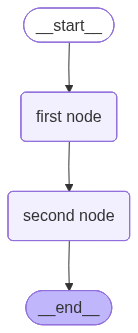

In [6]:
from IPython.display import display, Image # type: ignore
display(Image(app.get_graph().draw_mermaid_png()))  # Visualize the graph structure

In [7]:
answer = app.invoke({"name": "Ashik", "age": 25})  # Run the graph with initial state
answer["final"]  # Check the updated message in the state

'Hello Ashik! You are 25 years old.'

### Exercise for Graph 3

**Your task**:

1. Accept a user's name, age, and a list of their skills.
2. Pass the state through **three nodes** that
   - First node: Personalizes the name field with a greeting.
   - Second node: Describes the user's age.
   - Third node: Lists the user's skills in a formatted string.
3. The final output in the result field should be **combined message** in this formate:

**Output**: "Ashik, welcome to the system! You are 31 years old! You have skills in: Python, Machine Learning, and LangGraph"

*Hint*: You will need the add_edge method twice.

In [2]:
from typing import List, TypedDict
from langgraph.graph import StateGraph      # type: ignore

In [4]:
class AgentState(TypedDict):  # Our state schema
  name: str
  age: str
  skills: List[str]
  result: str

In [6]:
def first_node(state: AgentState) -> AgentState:
  """This is the first node in the graph"""

  state['result'] = f"{state['name']}, welcome to the system!"
  return state

def second_node(state: AgentState) -> AgentState:
  """This is the second node in the graph"""
  
  state['result'] += f" You are {state['age']} years old!"
  return state

def third_node(state: AgentState) -> AgentState:
  """This is the third node in the graph"""
  
  skills = ", ".join(state['skills'])
  state['result'] += f" You have skills in: {skills}"
  return state

In [7]:
graph = StateGraph(AgentState)
graph.add_node("first node", first_node)   # input: node and action
graph.add_node("second node", second_node) # input: node and action
graph.add_node("third node", third_node)   # input: node and action

graph.add_edge("first node", "second node")  # Connect the nodes in sequence
graph.add_edge("second node", "third node")  # Connect the nodes in sequence

graph.set_entry_point("first node")           # Set the entry point of the graph
graph.set_finish_point("third node")        # Set the finish point of the graph
app = graph.compile()  # Compile the graph into an executable application

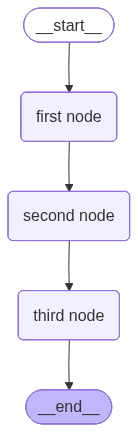

In [8]:
from IPython.display import display, Image # type: ignore
display(Image(app.get_graph().draw_mermaid_png()))  # Visualize the graph structure

In [9]:
result = app.invoke({"name": "Ashik", "age": 31, "skills": ["Python", "Machine Learning", "LangGraph"]})  # Run the graph with initial state
result["result"]  # Check the updated message in the state

'Ashik, welcome to the system! You are 31 years old! You have skills in: Python, Machine Learning, LangGraph'